DTW Analysis
Correlation Analysis
Time Window
No of leads

In [3]:
import pandas as pd
import numpy as np
import plotly.express as plx
import matplotlib.pyplot as plt
import glob

In [6]:
df = pd.read_excel("Diagnostics.xlsx")
df.head()

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SA,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354


<ipython-input-7-58666549429e>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  hist = df.hist(ax = ax, bins = 20)


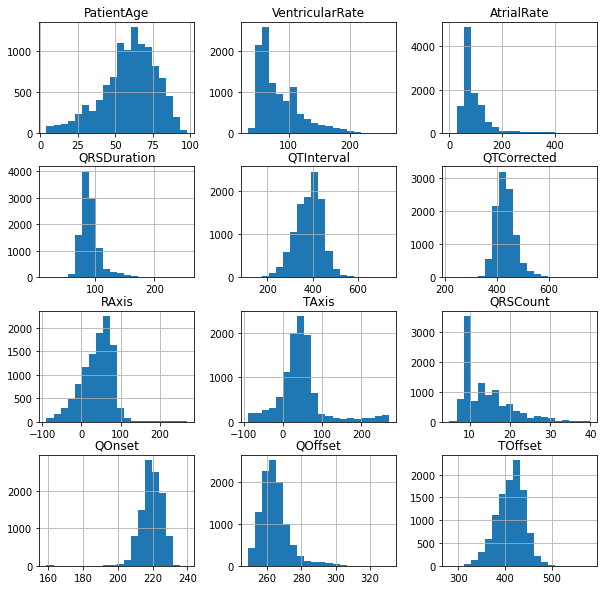

In [7]:
# Plotting the histogram of each column
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
hist = df.hist(ax = ax, bins = 20)

In [8]:
df.loc[df['Rhythm'].str.contains("AF"), "is_afib"] = "AF"
df.loc[~df['Rhythm'].str.contains("AF"), "is_afib"] = "Rest"

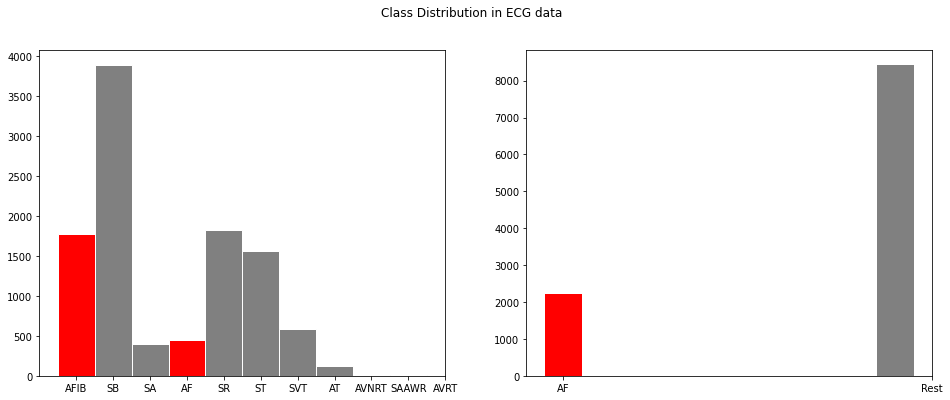

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,6))
fig.suptitle('Class Distribution in ECG data')
N, bins, patches = ax1.hist(df['Rhythm'], edgecolor='white', color = 'gray', align = 'left')
patches[0].set_facecolor('r')
patches[3].set_facecolor('r')
N, bins, patches = ax2.hist(df['is_afib'], align = 'left', color = 'gray')
patches[0].set_facecolor('r')
plt.show()

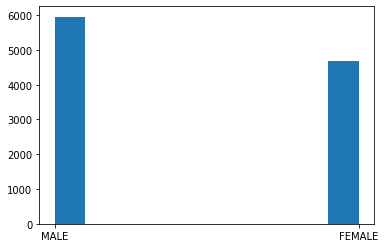

In [10]:
plt.hist(df['Gender'])
plt.show()

In [5]:
df_id = pd.read_csv("MUSE_20180712_154015_59000.csv", header=None, names=["I", "II", "III", "aVF", "aVR", "aVL", "V1", "V2", "V3", "V4", "V5", "V6"])
df_id.head()

,I,II,III,aVF,aVR,aVL,V1,V2,V3,V4,V5,V6
0,193.6000,462.46,285.28,-329.500,-49.00,373.01,-354.66,-1089.20,-1606.3,-1276.1,8.5411,819.21
1,92.9820,399.19,322.48,-247.360,-118.11,359.59,-290.79,-1035.40,-1611.2,-1450.3,-475.8300,220.59
2,2.7147,334.39,347.81,-169.680,-176.07,339.54,-237.12,-982.84,-1609.8,-1593.6,-901.9700,-302.07
3,-68.5600,268.23,352.77,-100.890,-214.30,308.74,-199.74,-929.47,-1594.2,-1679.6,-1221.5000,-689.76
4,-115.7600,203.29,334.90,-44.856,-229.03,267.23,-178.93,-870.52,-1556.7,-1692.7,-1406.2000,-913.95


In [12]:
df[df['FileName'] == 'MUSE_20180712_154015_59000']

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset,is_afib
6477,MUSE_20180712_154015_59000,AF,AVB,88,MALE,148,148,70,298,467,67,238,24,229,264,378,AF


In [13]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-13-935c2e534e54>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,PatientAge,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
PatientAge,1.000000,0.032784,0.123134,0.095891,0.095131,0.240466,-0.253646,0.083759,0.031308,0.018093,0.114092,0.098501
VentricularRate,0.032784,1.000000,0.533340,-0.054847,-0.853169,0.421672,0.091437,0.104201,0.997072,0.011266,-0.048688,-0.846037
AtrialRate,0.123134,0.533340,1.000000,-0.060148,-0.474084,0.252017,0.051855,0.050377,0.530587,0.037640,-0.034009,-0.463366
QRSDuration,0.095891,-0.054847,-0.060148,1.000000,0.196121,0.188760,-0.084620,0.009285,-0.053868,-0.424377,0.719834,0.103680
QTInterval,0.095131,-0.853169,-0.474084,0.196121,1.000000,0.025108,-0.123269,-0.056627,-0.850519,-0.082541,0.141702,0.976715
QTCorrected,0.240466,0.421672,0.252017,0.188760,0.025108,1.000000,-0.048156,0.071952,0.420488,-0.125955,0.100727,-0.002145
RAxis,-0.253646,0.091437,0.051855,-0.084620,-0.123269,-0.048156,1.000000,0.046593,0.090857,0.061945,-0.040955,-0.109254
TAxis,0.083759,0.104201,0.050377,0.009285,-0.056627,0.071952,0.046593,1.000000,0.103753,-0.075576,-0.048233,-0.072584
QRSCount,0.031308,0.997072,0.530587,-0.053868,-0.850519,0.420488,0.090857,0.103753,1.000000,0.010224,-0.048463,-0.843626
QOnset,0.018093,0.011266,0.037640,-0.424377,-0.082541,-0.125955,0.061945,-0.075576,0.010224,1.000000,0.323058,0.133192


In [6]:
corr = df_id.corr()
corr.style.background_gradient(cmap='coolwarm')


,I,II,III,aVF,aVR,aVL,V1,V2,V3,V4,V5,V6
I,1.000000,0.814670,-0.127627,-0.943999,0.851612,0.553780,-0.671323,-0.196766,0.054882,0.428937,0.812632,0.943674
II,0.814670,1.000000,0.461942,-0.959326,0.396714,0.932023,-0.885440,-0.562331,-0.336538,0.021530,0.493961,0.731082
III,-0.127627,0.461942,1.000000,-0.198659,-0.622611,0.748401,-0.511962,-0.702701,-0.702464,-0.660912,-0.422597,-0.204441
aVF,-0.943999,-0.959326,-0.198659,1.000000,-0.637573,-0.793914,0.826703,0.414678,0.163748,-0.218428,-0.671922,-0.869845
aVR,0.851612,0.396714,-0.622611,-0.637573,1.000000,0.041091,-0.266228,0.200438,0.398221,0.667144,0.848842,0.840968
aVL,0.553780,0.932023,0.748401,-0.793914,0.041091,1.000000,-0.865868,-0.701715,-0.533177,-0.249654,0.196623,0.461077
V1,-0.671323,-0.885440,-0.511962,0.826703,-0.266228,-0.865868,1.000000,0.810076,0.636489,0.294501,-0.223528,-0.553081
V2,-0.196766,-0.562331,-0.702701,0.414678,0.200438,-0.701715,0.810076,1.000000,0.950483,0.779309,0.347162,-0.012098
V3,0.054882,-0.336538,-0.702464,0.163748,0.398221,-0.533177,0.636489,0.950483,1.000000,0.898216,0.560628,0.226185
V4,0.428937,0.021530,-0.660912,-0.218428,0.667144,-0.249654,0.294501,0.779309,0.898216,1.000000,0.854746,0.609968


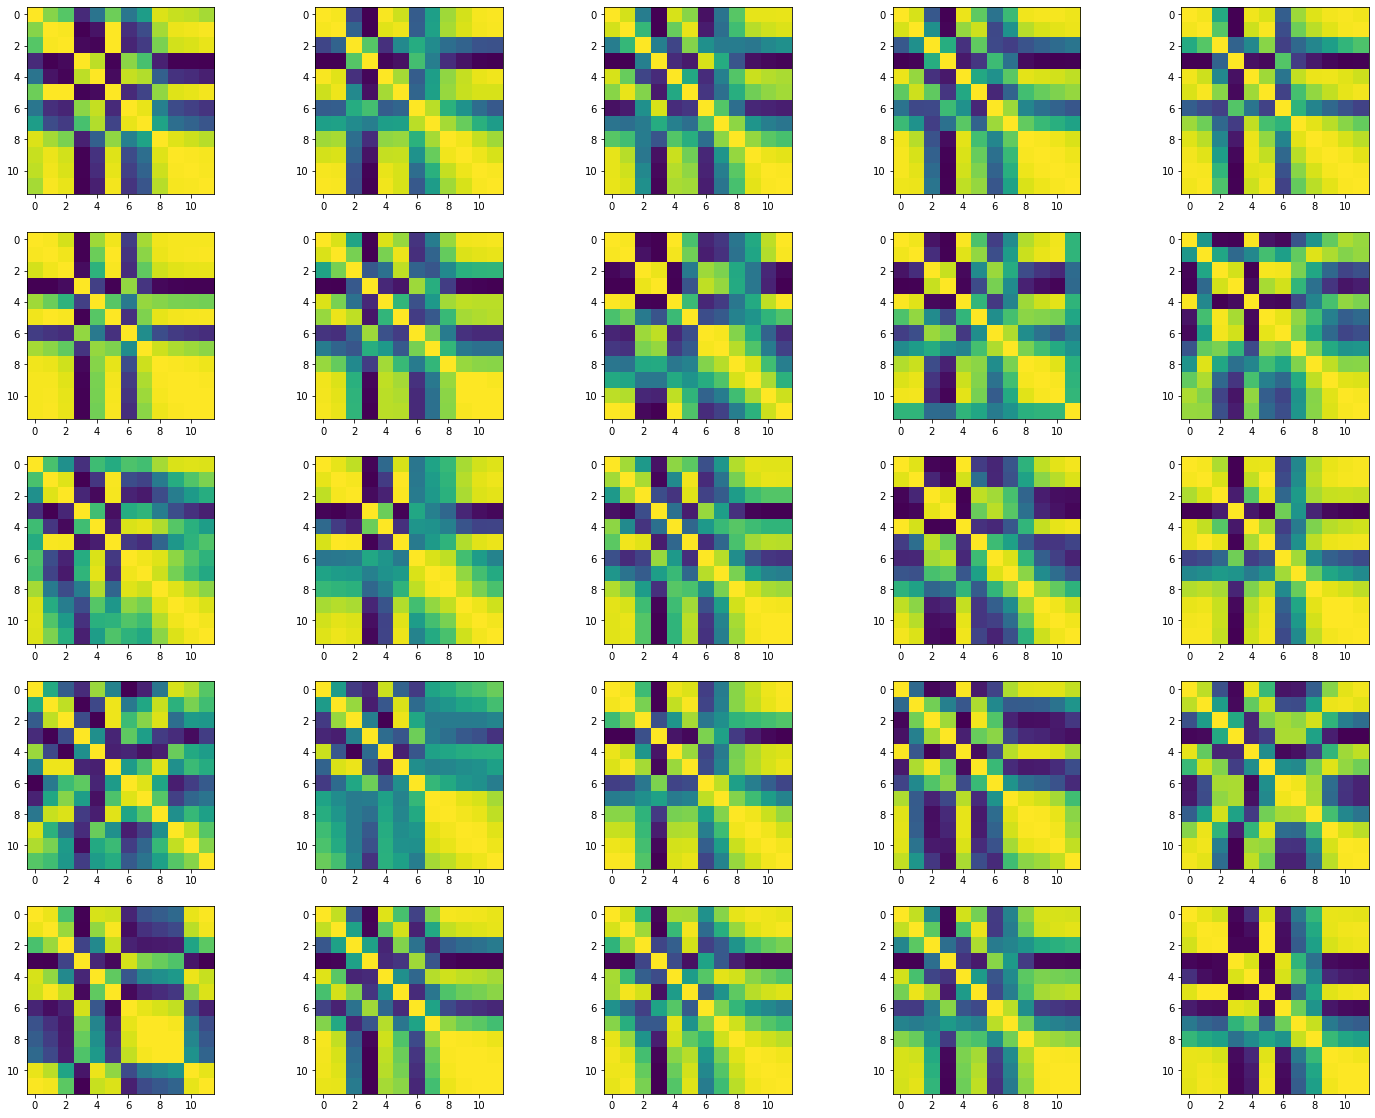

In [15]:
fig, ax = plt.subplots(5,5, figsize = (25,20))
ax = ax.ravel()
j = 0
for i in glob.glob('ECGDataDenoised/*.csv'):
    if j == 25:
        break 
    dftemp = pd.read_csv(i)
    corr = dftemp.corr()
    ax[j].imshow(corr)
    j+=1

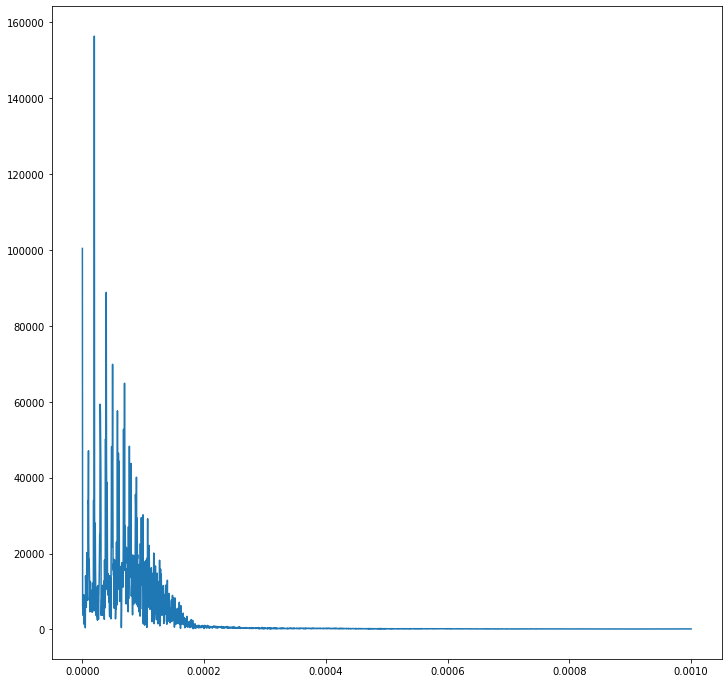

In [8]:
from scipy.fft import rfft, rfftfreq

fig = plt.figure(figsize=(12,12))
yf = rfft(list(df_id['I']))
xf = rfftfreq(5000, 1/0.002)

plt.plot(xf, np.abs(yf))
plt.show()

In [9]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

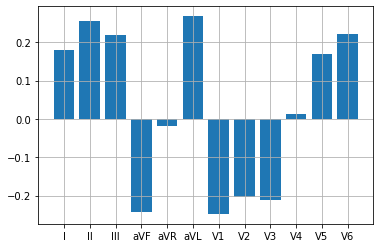

In [11]:
snr = []
for i in df_id.columns:
    snr.append(signaltonoise(list(df_id[i])))

plt.bar(df_id.columns, snr)
plt.grid()
plt.show()